In [72]:
import os

import numpy as np
import seaborn as sns
import torch
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader

from src.NSynthDataset import NSynthDataset
from src.classifier import AudioClassifier
from src.classifier_train import train_classifier

In [29]:
batch_size = 50
lr = 1e-4
epochs = 10
z_size = 1

# min len =16000
sr = 8191
duration = 2
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

In [30]:
os.chdir('../../..')
path = 'mnt/data/public/NSynth/'

In [31]:
train_set = NSynthDataset(data_path=path, 
                          mel=False,  label='pitch', 
                          sampling_rate=sr, duration=duration, 
                          min_class_count=10000, max_class_count=3000,
                          z_size=z_size)

val_set = NSynthDataset(data_path=path, stage='valid',
                          mel=False,  label='pitch', 
                          sampling_rate=sr, duration=duration, 
                          cond_classes=train_set.cond_classes,
                          p_enc=train_set.p_enc,
                          z_size=z_size)

In [7]:
train_set.annot

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities,instrument_class_str,instrument_class,pitch_enc
organ_electronic_120-050-127,88495,16000,50,1,organ,organ_electronic_120,organ_electronic_120-050-127,[],electronic,127,6,979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",organ_electronic,"[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
bass_synthetic_016-080-127,277634,16000,80,2,bass,bass_synthetic_016,bass_synthetic_016-080-127,"[bright, long_release]",synthetic,127,0,241,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0]",bass_synthetic,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
bass_synthetic_130-072-100,274364,16000,72,2,bass,bass_synthetic_130,bass_synthetic_130-072-100,[],synthetic,100,0,907,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",bass_synthetic,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
bass_synthetic_077-057-127,280130,16000,57,2,bass,bass_synthetic_077,bass_synthetic_077-057-127,[],synthetic,127,0,692,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",bass_synthetic,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
organ_electronic_025-056-127,253445,16000,56,1,organ,organ_electronic_025,organ_electronic_025-056-127,[dark],electronic,127,6,411,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",organ_electronic,"[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
string_acoustic_066-068-050,106114,16000,68,0,string,string_acoustic_066,string_acoustic_066-068-050,"[bright, nonlinear_env, reverb]",acoustic,50,8,532,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",string_acoustic,"[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
string_acoustic_082-053-075,34429,16000,53,0,string,string_acoustic_082,string_acoustic_082-053-075,[reverb],acoustic,75,8,699,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",string_acoustic,"[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
mallet_acoustic_009-049-075,148250,16000,49,0,mallet,mallet_acoustic_009,mallet_acoustic_009-049-075,"[fast_decay, percussive]",acoustic,75,5,116,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]",mallet_acoustic,"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
bass_synthetic_017-080-127,221890,16000,80,2,bass,bass_synthetic_017,bass_synthetic_017-080-127,"[bright, distortion, long_release]",synthetic,127,0,249,"[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]",bass_synthetic,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
train_set.label_size == train_set.annot['pitch'].nunique()

True

In [9]:
model, loss_hist = train_classifier(train_set, epochs=epochs, batch_size=batch_size, lr=lr,
                                    pretr_epochs=0, save_epochs=10,
                                    save_dir='users/adcy353/GANs-Conditional-Audio-Synthesis/eval/')

Working on cuda
AudioClassifier(
  (conv_layers): Sequential(
    (0): Conv1d(1, 64, kernel_size=(25,), stride=(4,), padding=(11,))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv1d(64, 128, kernel_size=(25,), stride=(4,), padding=(11,))
    (3): LeakyReLU(negative_slope=0.2)
    (4): Conv1d(128, 256, kernel_size=(25,), stride=(4,), padding=(11,))
    (5): LeakyReLU(negative_slope=0.2)
    (6): Conv1d(256, 512, kernel_size=(25,), stride=(4,), padding=(11,))
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv1d(512, 1024, kernel_size=(25,), stride=(4,), padding=(11,))
    (9): LeakyReLU(negative_slope=0.2)
    (10): Conv1d(1024, 2048, kernel_size=(25,), stride=(4,), padding=(11,))
    (11): LeakyReLU(negative_slope=0.2)
  )
  (linear): Linear(in_features=8192, out_features=41, bias=True)
  (softmax): Softmax(dim=1)
)


100%|██████████| 300/300 [00:42<00:00,  6.98it/s]



EPOCH 1/10: Avg loss: 0.001, Train accuracy: 0.625


100%|██████████| 300/300 [00:38<00:00,  7.78it/s]



EPOCH 2/10: Avg loss: 0.000, Train accuracy: 0.862


100%|██████████| 300/300 [00:39<00:00,  7.60it/s]



EPOCH 3/10: Avg loss: 0.000, Train accuracy: 0.889


100%|██████████| 300/300 [00:38<00:00,  7.73it/s]



EPOCH 4/10: Avg loss: 0.000, Train accuracy: 0.905


100%|██████████| 300/300 [00:39<00:00,  7.64it/s]



EPOCH 5/10: Avg loss: 0.000, Train accuracy: 0.916


100%|██████████| 300/300 [00:38<00:00,  7.74it/s]



EPOCH 6/10: Avg loss: 0.000, Train accuracy: 0.926


100%|██████████| 300/300 [00:39<00:00,  7.66it/s]



EPOCH 7/10: Avg loss: 0.000, Train accuracy: 0.934


100%|██████████| 300/300 [00:38<00:00,  7.72it/s]



EPOCH 8/10: Avg loss: 0.000, Train accuracy: 0.942


100%|██████████| 300/300 [00:39<00:00,  7.68it/s]



EPOCH 9/10: Avg loss: 0.000, Train accuracy: 0.950


100%|██████████| 300/300 [00:38<00:00,  7.70it/s]



EPOCH 10/10: Avg loss: 0.000, Train accuracy: 0.956


In [32]:
test_set = NSynthDataset(data_path=path, stage='test',
                          mel=False,  label='pitch', 
                          sampling_rate=sr, duration=duration, 
                          cond_classes=train_set.cond_classes,
                          p_enc=train_set.p_enc,
                          z_size=z_size)

In [33]:
C = AudioClassifier(out_dim=train_set.label_size).to(device)
C.load_state_dict(torch.load(f'users/adcy353/GANs-Conditional-Audio-Synthesis/eval/class_0.0001-9.pt'))
C.eval()

AudioClassifier(
  (conv_layers): Sequential(
    (0): Conv1d(1, 64, kernel_size=(25,), stride=(4,), padding=(11,))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv1d(64, 128, kernel_size=(25,), stride=(4,), padding=(11,))
    (3): LeakyReLU(negative_slope=0.2)
    (4): Conv1d(128, 256, kernel_size=(25,), stride=(4,), padding=(11,))
    (5): LeakyReLU(negative_slope=0.2)
    (6): Conv1d(256, 512, kernel_size=(25,), stride=(4,), padding=(11,))
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv1d(512, 1024, kernel_size=(25,), stride=(4,), padding=(11,))
    (9): LeakyReLU(negative_slope=0.2)
    (10): Conv1d(1024, 2048, kernel_size=(25,), stride=(4,), padding=(11,))
    (11): LeakyReLU(negative_slope=0.2)
  )
  (linear): Linear(in_features=8192, out_features=41, bias=True)
  (softmax): Softmax(dim=1)
)

In [34]:
testloader = DataLoader(test_set, batch_size=test_set.__len__())

In [69]:
def accuracy_score(loader, C, device='cuda'):
    correct_preds = 0
    for (x, y_true, _) in loader:
        x, y_true = x.to(device), y_true.to(device)
        y_pred = C(x)
        max_idx = torch.argmax(y_pred, dim=1)
        preds = torch.zeros_like(y_pred).to(device)
        preds[torch.arange(y_pred.shape[0]).to(device), max_idx] = 1
        correct_preds += (preds * y_true).sum()
        print(preds.shape, y_true.shape)
        print(preds.sum(dim=1), y_true.sum(dim=1))
        cm = confusion_matrix(np.argmax(np.array(y_true.cpu()), axis=1), np.argmax(preds.cpu(), axis=1), normalize='true')
    accuracy = correct_preds / (len(loader) * loader.batch_size)

    return accuracy, cm

In [70]:
acc, cm = accuracy_score(testloader, C)
acc

torch.Size([1202, 41]) torch.Size([1202, 41])
tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0') tensor([1, 1, 1,  ..., 1, 1, 1], device='cuda:0')


tensor(0.9484, device='cuda:0')

<AxesSubplot:>

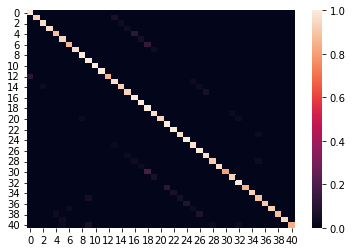

In [73]:
sns.heatmap(cm)